# Сервис для статистического анализа потока посетителей.
## Пол, возраст и интенсивность посещений.

In [1]:
import models

fdet = models.FaceDetection()
fdes = models.FaceDescription('data/model_weights/LandmarkFace.dat', 'data/model_weights/ResNetFace.dat')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Нахождение и распознавание лиц
## Благодоря технологиям идентификации человека по лицу наш сервис всегда знает, кто когда зашел и ушел, а так же сколько человек сейчас находится в помещении
### Пример "Face Detection"
<img src="data/images/facedetect.png" width="50%">

In [2]:
import cv2

cap = cv2.VideoCapture(0)

facesV = []

while True:

    ret, frame = cap.read()

    dets = fdet.faceDetection(frame)
    
    facesV = fdes.faceDesctiption(frame, dets = dets)
    
    for k, d in enumerate(dets):
        cv2.rectangle(frame, (d.left(), d.top()), (d.right(), d.bottom()), (0, 0, 255), 1, 8, 0)

    cv2.imshow('capture', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

# Описание лиц 128-мерным вектором 
## После нахождения лиц на изображении нейронная сеть типа ResNet-34 раскладывает его в 128-мерный вектор. После мы можем их сравнивать на схожесть. 

### Пример "Face Description"
<img src="data/images/facesPlot.png" width="50%">

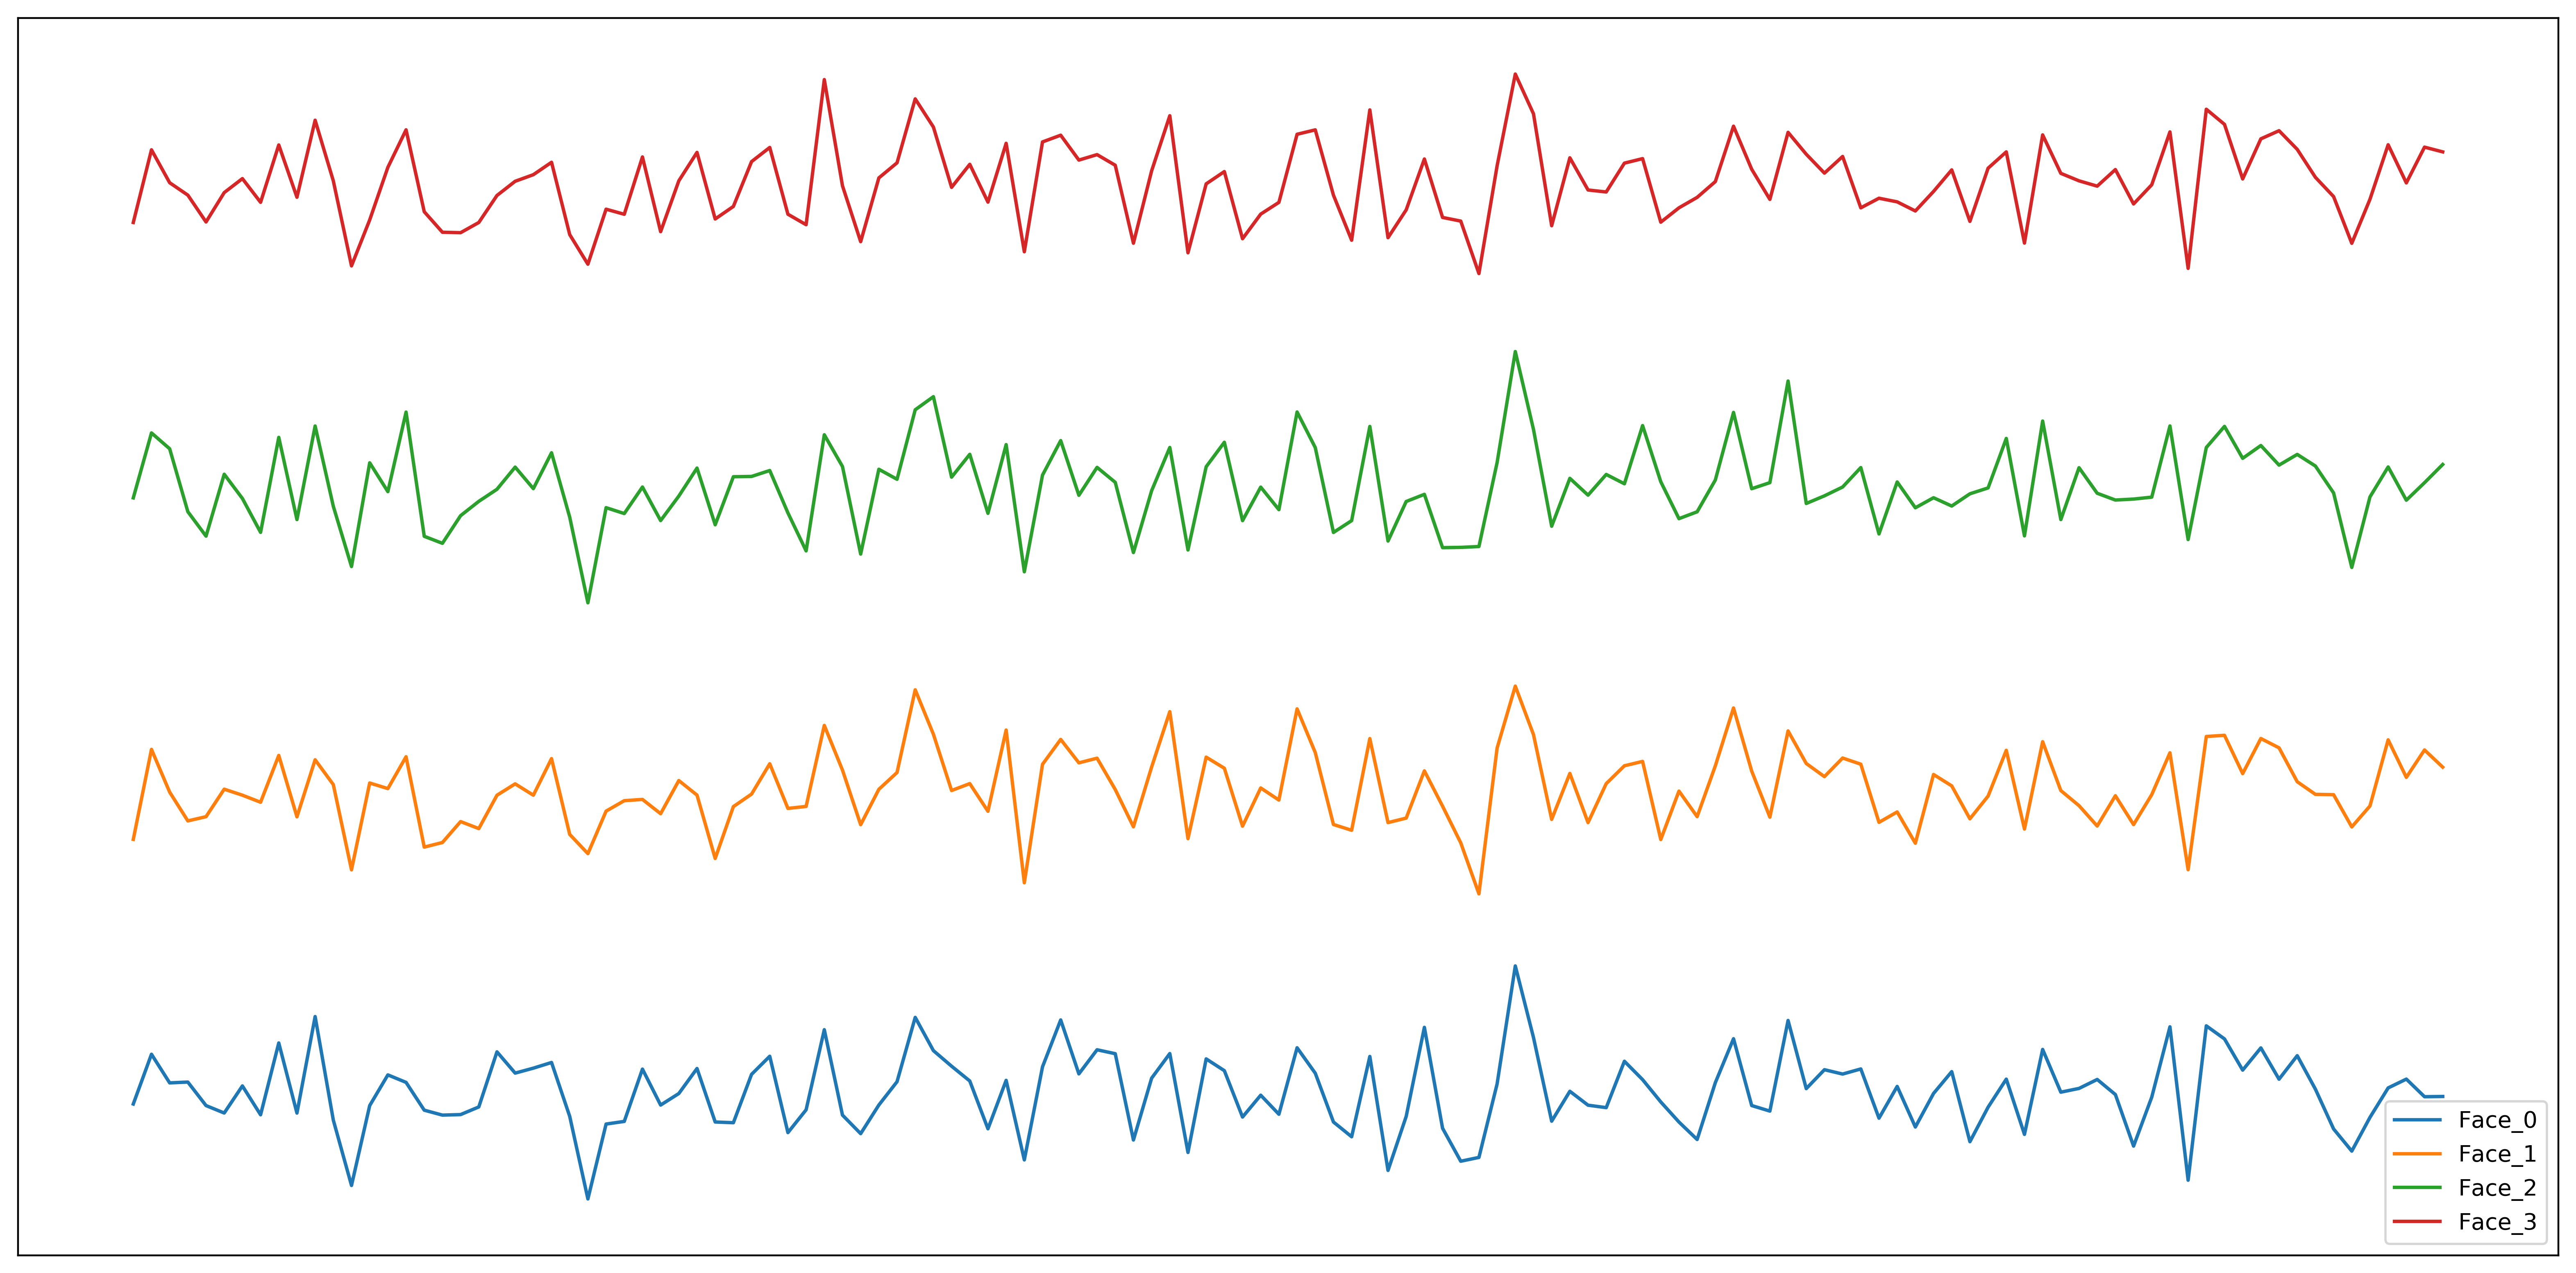

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10), dpi = 400)

for i,face in enumerate(facesV):
    plt.plot(face + i, label = 'Face_' + str(i))
plt.legend()
plt.xticks([])
plt.yticks([])

plt.show()